# Data Visualization with Python Matplotlib
Dalam menganalisa data, sering kali menggunakan visualisasi data untuk memahami karakteristik maupun trend di dalam data yang dimiliki. 

Salah satu library di python yang biasa digunakan untuk keperluan visualisasi data adalah matplotlib.

Ini merupakan pembelajaran Data Visualization dengan Matplotlib dari media belajar DQLab, pada pembahasan ini mempelajari mengenai **Antomi dari sebuah Figure** dari sebuah visualisasi data

## Pengenalan Dataset

In [1]:
import pandas as pd
dataset = pd.read_csv('data/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


### Penjelasan Dataset

1.	order_id : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer
2.	order_date : tanggal terjadinya transaksi
3.	customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
4.	city : kota tempat toko terjadinya transaksi
5.	province : provinsi (berdasarkan city)
6.	product_id : ID dari suatu product yang dibeli
7.	brand : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama
8.	quantity : Kuantitas / banyaknya product yang dibeli
9.	item_price : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli


### Penambahan Kolom Order Month pada Dataset
Ada beberapa function yang berperan di sini:
1.	apply & lambda biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x: x*2) berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja
2.	Function datetime.datetime.strptime digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
3.	Function  strftime digunakan untuk mengubah format suatu data bertime datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti outputnya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada. 


In [2]:
import datetime
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


### Penambahan Kolom GMV (Gross Merchandise Value) pada Dataset
Definisikan GMV adalah perkalian setiap entri di kolom item_price dan kolom quantity. 

In [3]:
dataset ['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


### Membuat Data Agregat/ Mengumpulkan beberapa elemen

In [4]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


### Plot Pertama: Membuat Line Chart Trend Pertumbuhan GMV

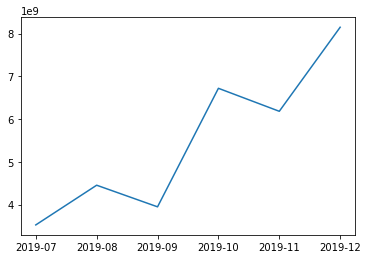

In [8]:
import matplotlib.pyplot as plt
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

### Cara Alternatif: Fungsi .plot() pada pandas Dataframe

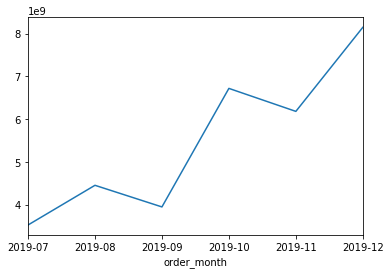

In [6]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

## Anatomi dari Figure
![](gambar/anatomi.png)

Ada beberapa istilah dan komponen di sebuah plot, nanti akan mempermudah mengingat function apa yang digunakan untuk memodifikasinya.
1.	Figure adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.
2.	Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut Axes. Sebuah Figure bisa terdiri dari beberapa Axes. 
3.	Setiap Axes biasanya memiliki sumbu-X (X-axis) dan sumbu-Y (Y-axis). Masing-masing sumbu memiliki komponen sebagai berikut:
    - Axis Label: Nama dari sumbu yang ditampilkan.
    - Tick: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.
	- Tick Label: Tulisan di tiap tick yang menyatakan nilainya.
4.	Untuk isi grafiknya sendiri, bisa berupa line (untuk line plot), atau marker (untuk scatter plot), bisa juga bentuk lain seperti bar (untuk bar plot / histogram).
5.	Aksesoris lain yang bisa ditambahkan, di antaranya Grid untuk mempermudah melihat tick yang sejajar, dan Text untuk memberikan informasi tambahan berbentuk teks di grafik.


### Mengubah Figure Size

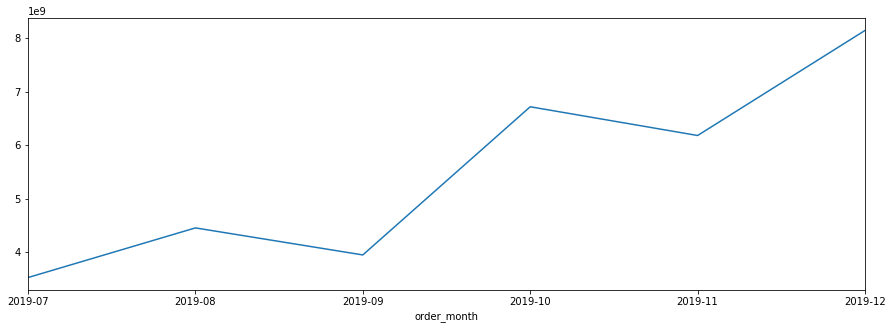

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5)) # Mengubah Figure Size
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

### Menambahkan Title and Axis Labels

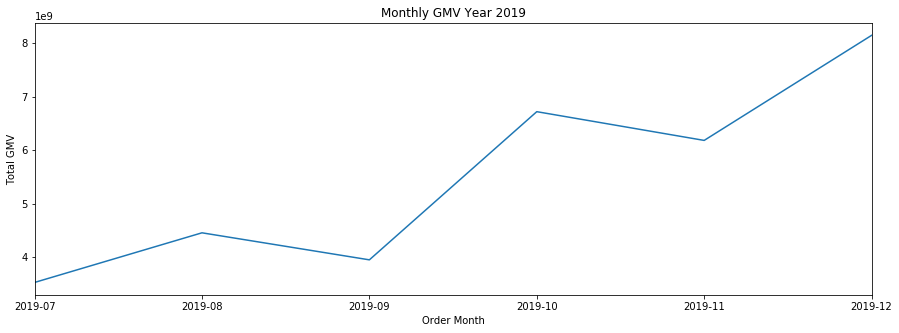

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019') # Menambahkan Title
plt.xlabel('Order Month') # Axis Labels
plt.ylabel('Total GMV') # Axis Labels
plt.show()

### Kustomisasi Title and Axis Labels
Misalnya, untuk judul/title, parameter yang bisa ditambahkan:
-	loc: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka defaultnya title ada di tengah.
-	pad: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
-	fontsize: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).
-	color: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.

Untuk xlabel dan ylabel, kita bisa mengganti fontsize dan color, tetapi tidak bisa mengganti loc.


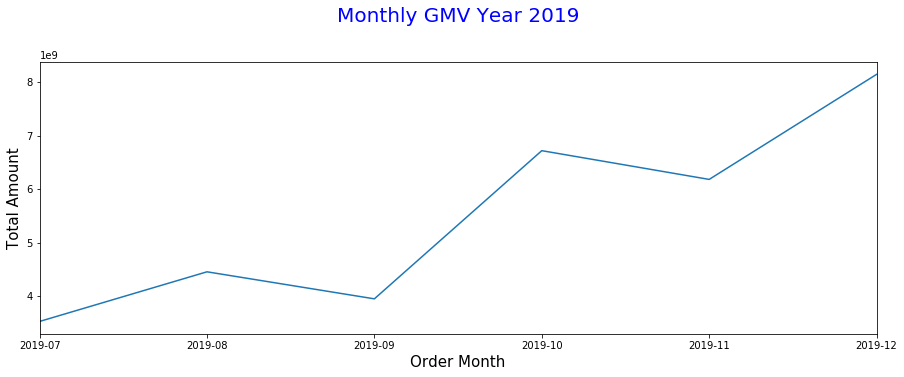

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue') # Kustomisasi Title 
plt.xlabel('Order Month', fontsize=15) # Kustomisasi Axis Labels
plt.ylabel('Total Amount', fontsize=15) # Kustomisasi Axis Labels
plt.show()

### Kustomisasi Line dan Point
Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function .plot(). Beberapa parameter yang bisa dikustomisasi:
-	color: mengubah warnanya (sama seperti di title)
-	linewidth: mengubah ketebalan line/garisnya (dalam satuan px)
-	linestyle: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.
-	marker: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.


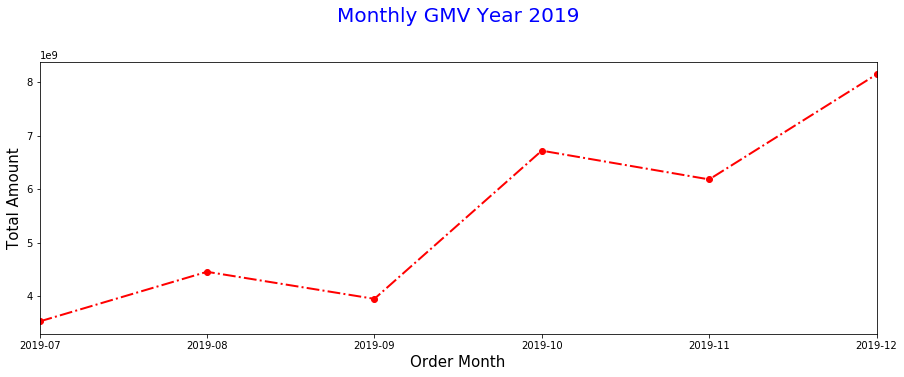

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='red', marker='o', linestyle='-.', linewidth=2) #Kustomisasi Line dan Point
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

### Kustomisasi Grid

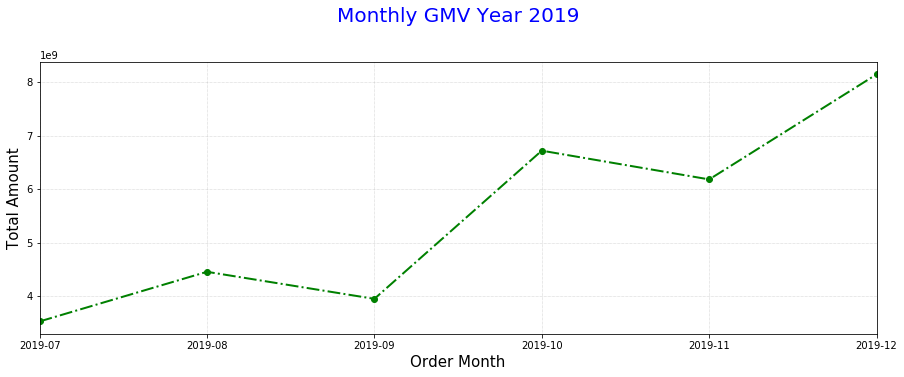

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5) # Kustomisasi Grid
plt.show()

### Kustomisasi Axis Ticks
Nilai-nilai di sumbu x dan y bisa diakses melalui function plt.xticks() dan plt.yticks()

Dapat dilihat bahwa plt.ticks() yang sebelumnya, digantikan dengan nilai baru yaitu nilai awal dibagi dengan 1 milyar (1000000000)

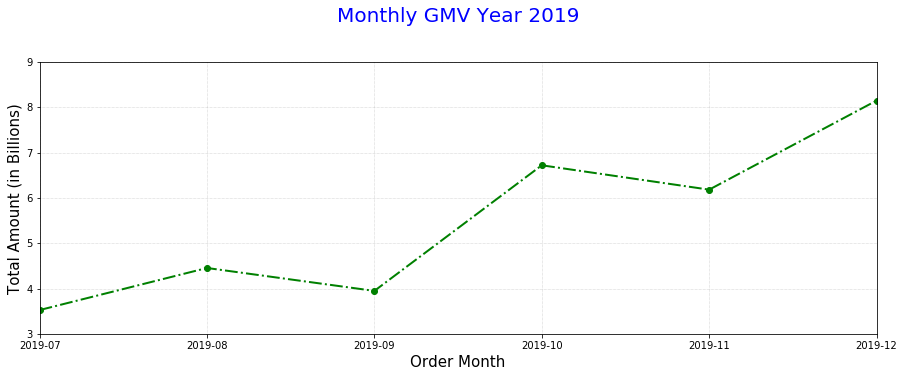

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int)) # perbedaan terlihat pada pojok kiri atas sudah tidak ada 1e9
plt.show()

### Menentukan Batas Minimum dan Maksimum Axis Ticks
Di sini dapat dilihat bahwa nilai terkecil di sumbu-y adalah 150. Ini kadang bisa membuat orang tertipu sih, seakan-akan GMV di bulan Oktober naik menjadi hampir 3 kali lipat dari September. Untuk itu sebaiknya diset agar sumbu-y nya dimulai dari 0, cukup tambahkan plt.ylim(ymin=0) seperti ini:

C:\Users\Abiyosowr\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3455: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


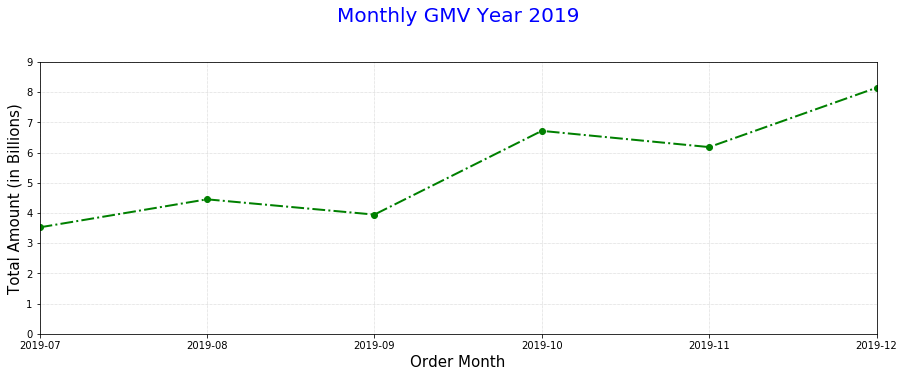

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0) # Batas Minimum dan Maksimum Axis Ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

### Menambahkan Informasi Pada Plot
Perhatikan bahwa ada beberapa parameter yang diset saat menggunakan plt.text. Dua angka pertama itu adalah koordinat, x dan y. Saat set transform=fig.transFigure, maka koordinatnya berkisar 0 sampai 1 (untuk x dari kanan ke kiri, dan untuk y, dari bawah ke atas).

Jika parameter transform tidak diisi, maka koordinatnya dalam satuan inch (Dalam contoh ini, dari 0-15 dari kiri ke kanan, dan 0-5 dari bawah ke atas). Seperti halnya title atau label, dimungkinkan juga untuk set warna dan ukuran hurufnya.

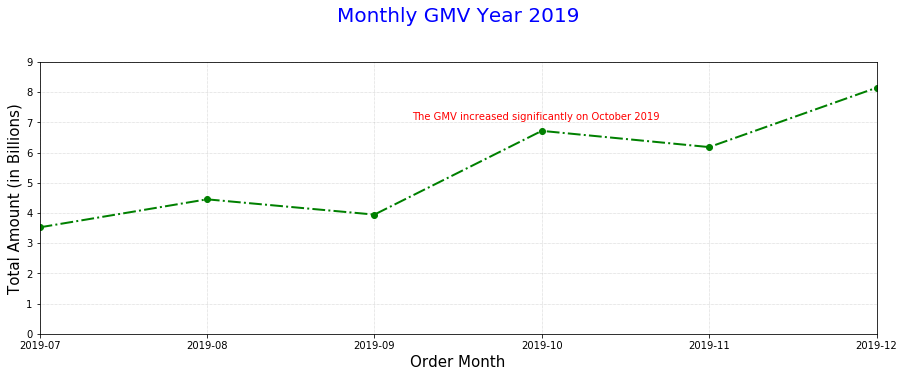

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.47, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red') # + Informasi
plt.show()

### Menyimpan Hasil Plot Menjadi File Image
Kita bisa menyimpannya ke berbagai tipe file, seringnya sih jpg, png, atau kadang pdf juga bisa. Untuk mengetahui format lengkapnya, kita bisa menggunakan code berikut:
> plt.gcf().canvas.get_supported_filetypes()

dengan outputnya menunjukkan ke dalam tipe file apa saja dapat disimpan 

![](gambar/filetipe.png)

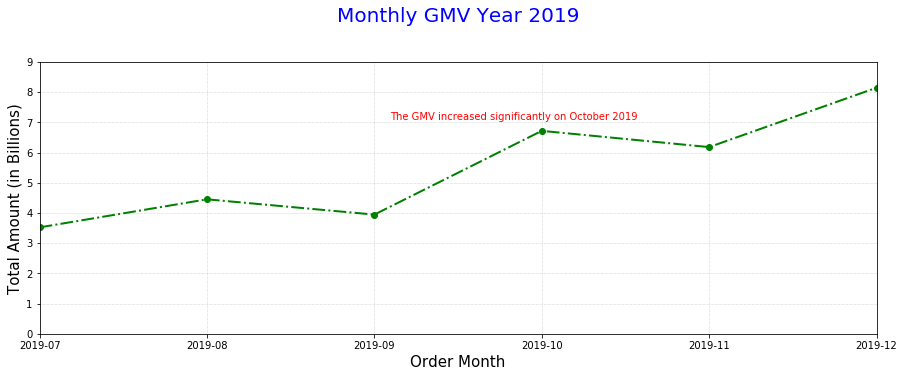

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
# plt.savefig('monthly_gmv.png') # contoh kode untuk menyimpan image
plt.show()

### Pengaturan Parameter untuk Menyimpan Gambar
Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:
-	dpi: Resolusi gambar (dots per inch). 
-	quality: Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).
-	facecolor: Memberikan warna bagian depan figure, di luar area plot 
-	edgecolor: Memberikan warna pinggiran gambar
-	transparent: Jika nilainya True, maka gambarnya jadi transparan (jika filenya png)

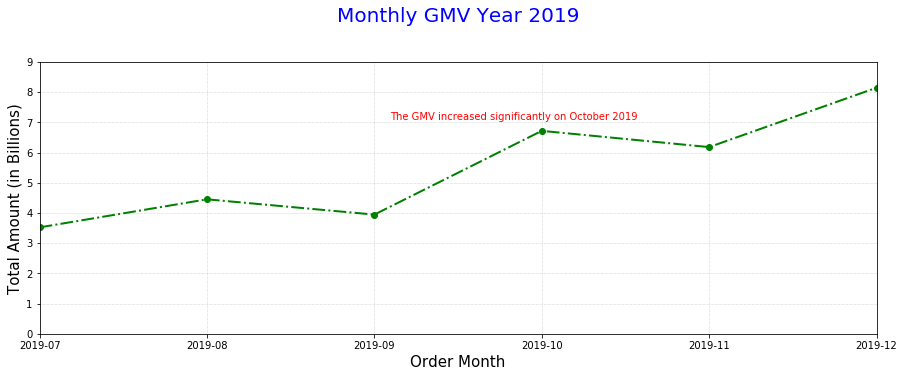

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
# plt.savefig('monthly_gmv.png', quality=95) # contoh kode Pengaturan Parameter untuk Menyimpan Gambar
plt.show()

### Studi Kasus dari Senja: Daily number of customers on Desember
buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.
Beberapa spesifikasi yang harus diperhatikan:
-	Ukuran figure adalah 10x5
-	Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019
-	Sumbu-y adalah jumlah unique customers di tiap tanggal
-	Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri


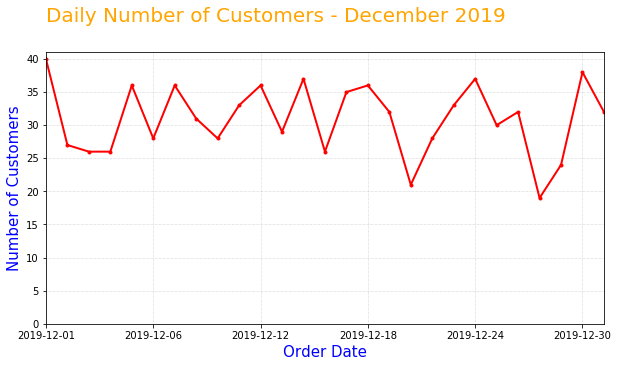

In [29]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset 
dataset = pd.read_csv('data/retail_raw_reduced.csv')

# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

# Buat kolom gmv
dataset ['gmv'] = dataset['item_price'] * dataset['quantity']

# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=30, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()